# Salary Structure & Success in MLS 

The data included in this project is from Tom Worville (https://worville.github.io/jekyll/update/2018/05/13/Cleaning-The-MLS-Salary-Dump.html). He cleaned the data from the MLS Players Union website (https://mlsplayers.org/resources/salary-guide) and added roster designations from the MLS website onto the original table.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set(rc={"figure.figsize": (12, 6)})

In [3]:
df = pd.read_csv('mls-full-salary-info-05-18.csv')
df.head()

,first_name,last_name,team_id,team,player,shirt_num,pos,club,base_salary,total_compensation,...,senior,supplemental,disabled_list,on_loan,season_end_injury,DP,INTL,GA,HG,YDP
0,Aaron,Herrera,18,Real Salt Lake,"Herrera, Aaron",22,D,Real Salt Lake,67500.0,67500.0,...,0,0,0,0,0,0,0,0,1,0
1,Aaron,Kovar,9,Lafc,"Kovar, Aaron",11,M,LAFC,69457.5,69657.5,...,0,0,0,0,0,0,0,0,1,0
2,Aaron,Long,14,New York Red-Bulls,"Long, Aaron",33,D,New York Red Bulls,73125.0,73125.0,...,1,0,0,0,0,0,0,0,0,0
3,Aaron,Maund,23,Vancouver Whitecaps,"Maund, Aaron",22,D,Vancouver Whitecaps,180000.0,189437.5,...,1,0,0,0,0,0,0,0,0,0
4,Abu,Danladi,10,Minnesota United,"Danladi, Abu",9,F,Minnesota United,135000.0,186000.0,...,0,1,0,0,0,0,0,1,0,0


### Data Cleaning###

- Changed the names in the team column to make them more readable/accessible
- Deleted the redundant club column
- Created a new column for TAM (Targeted Allocation Money) players

In [4]:
df.columns

Index(['first_name', 'last_name', 'team_id', 'team', 'player', 'shirt_num',
       'pos', 'club', 'base_salary', 'total_compensation', 'reserve', 'senior',
       'supplemental', 'disabled_list', 'on_loan', 'season_end_injury', 'DP',
       'INTL', 'GA', 'HG', 'YDP'],
      dtype='object')

In [5]:
df['team'].unique()

array(['Real Salt Lake', 'Lafc', 'New York Red-Bulls',
       'Vancouver Whitecaps', 'Minnesota United', 'Orlando City',
       'Columbus Crew Sc', 'Philadelphia Union', 'Houston Dynamo',
       'Sporting Kansas City', 'Atlanta United', 'Montreal Impact',
       'Chicago Fire', 'Toronto Fc', 'Seattle Sounders',
       'New York City-Fc', 'Portland Timbers', 'Colorado Rapids',
       'New England Revolution', 'San Jose Earthquakes', 'Fc Dallas',
       'La Galaxy', 'Dc United'], dtype=object)

In [6]:
df['team'].replace('Lafc', 'LAFC', inplace=True)
df['team'].replace('New York Red-Bulls', 'New York Red Bulls', inplace=True)
df['team'].replace('Columbus Crew Sc', 'Columbus Crew SC', inplace=True)
df['team'].replace('Toronto Fc', 'Toronto FC', inplace=True)
df['team'].replace('New York City-Fc', 'New York City FC', inplace=True)
df['team'].replace('Fc Dallas', 'FC Dallas', inplace=True)
df['team'].replace('La Galaxy', 'LA Galaxy', inplace=True)
df['team'].replace('Dc United', 'DC United', inplace=True)

In [7]:
df['team'].unique()

array(['Real Salt Lake', 'LAFC', 'New York Red Bulls',
       'Vancouver Whitecaps', 'Minnesota United', 'Orlando City',
       'Columbus Crew SC', 'Philadelphia Union', 'Houston Dynamo',
       'Sporting Kansas City', 'Atlanta United', 'Montreal Impact',
       'Chicago Fire', 'Toronto FC', 'Seattle Sounders',
       'New York City FC', 'Portland Timbers', 'Colorado Rapids',
       'New England Revolution', 'San Jose Earthquakes', 'FC Dallas',
       'LA Galaxy', 'DC United'], dtype=object)

In [8]:
df.drop('club', axis=1, inplace=True)

In [9]:
def tam_player(row):
    if row['base_salary'] > 504375 and row['DP'] == 0 and row['YDP'] == 0:
        return 1
    else:
        return 0

This is a function that allows us to filter out those players who earn over the Designated Player threshold ($504,375), but are not DPs. 

In [10]:
df['TAM'] = df.apply(tam_player, axis= 1)

In [11]:
df.head()

,first_name,last_name,team_id,team,player,shirt_num,pos,base_salary,total_compensation,reserve,...,supplemental,disabled_list,on_loan,season_end_injury,DP,INTL,GA,HG,YDP,TAM
0,Aaron,Herrera,18,Real Salt Lake,"Herrera, Aaron",22,D,67500.0,67500.0,1,...,0,0,0,0,0,0,0,1,0,0
1,Aaron,Kovar,9,LAFC,"Kovar, Aaron",11,M,69457.5,69657.5,1,...,0,0,0,0,0,0,0,1,0,0
2,Aaron,Long,14,New York Red Bulls,"Long, Aaron",33,D,73125.0,73125.0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aaron,Maund,23,Vancouver Whitecaps,"Maund, Aaron",22,D,180000.0,189437.5,0,...,0,0,0,0,0,0,0,0,0,0
4,Abu,Danladi,10,Minnesota United,"Danladi, Abu",9,F,135000.0,186000.0,0,...,1,0,0,0,0,0,1,0,0,0


### League Analysis###
This is an overview of the league. Here we'll take a look at:
    - total money spent by each team
    - number of (young) designated players, TAM players, international players, and homegrown players on each team

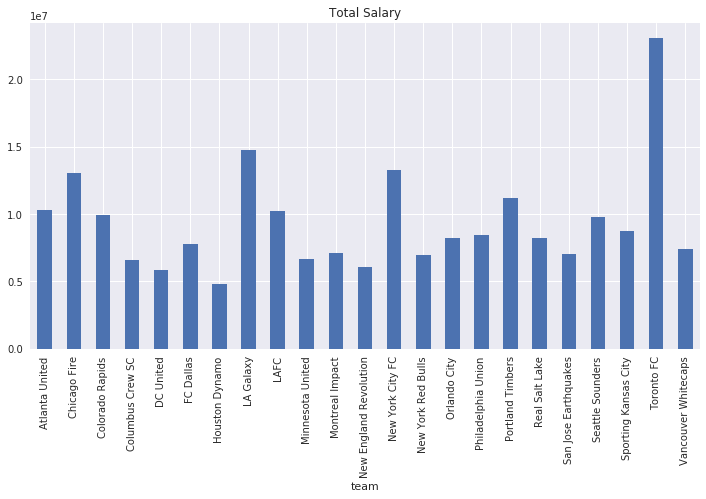

In [12]:
df.groupby('team')['base_salary'].sum().plot(kind='bar', title='Total Salary')

Immediately, we notice that Toronto FC spends twice as much as any other club and four times as much as Houston Dynamo. 

Ideally, the big spenders expect results that correlate to spending. However, that is not the truth so far this season. There are 23 teams in the league and  the biggest spender, Toronto FC, is in 18th place. Houston Dynamo, last in spending, are in 12th.

In [13]:
#Salary in Millions spent by each team
df.groupby('team')['base_salary'].sum().sort_values(ascending=False)

team
Toronto FC                23036297.21
LA Galaxy                 14731679.79
New York City FC          13249557.75
Chicago Fire              13015346.10
Portland Timbers          11209418.04
Atlanta United            10314616.49
LAFC                      10215368.77
Colorado Rapids            9913976.61
Seattle Sounders           9767458.36
Sporting Kansas City       8770989.60
Philadelphia Union         8436949.79
Orlando City               8230667.88
Real Salt Lake             8228527.92
FC Dallas                  7774754.28
Vancouver Whitecaps        7367516.36
Montreal Impact            7096410.72
San Jose Earthquakes       7007234.70
New York Red Bulls         6956063.16
Minnesota United           6684391.86
Columbus Crew SC           6577583.43
New England Revolution     6072173.54
DC United                  5878292.94
Houston Dynamo             4806684.09
Name: base_salary, dtype: float64

In MLS, roster rules are so complex that we should be less interested in what teams spend, but how they spend it.

### Relevant Roster Rules ###
The salary cap in MLS in the year 2018 is 4,035,000. 

DP: Any player paid above 504,375 can be a DP (max salary counted towards cap). Any player paid above 1,500,000 must be a DP.

YDP: These are young designate players. A team with a DP that is less than 20 years old only takes a 150,000 cap hit. Teams with DPs between 21 and 23 years old take a salary cap hit of 200,000.

TAM: Players that make less than or equal to 1.5 million can be bought down to under the 504,375 maximum salary with targetted allocation money. The players bought down this way are known around the league as TAM players.

INTL: Each team can have a maximum of 8 international players. However, they can buy or trade slots to/from any other team in the league to sign over the maximum amount of international players.

HG: Homegrown players are a bargain because no amount of their contract counts torwards the team's salary cap. Homegrown players are players that come through a team's academy. 

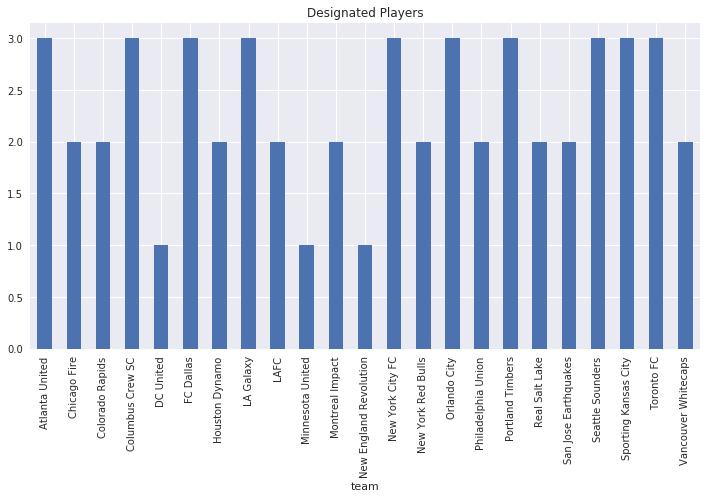

In [14]:
# Number of DPs (YDPs included) on each team
df[(df['DP']== 1) | (df['YDP'] == 1)].groupby(df['team']).count()['DP'].plot(kind='bar', title='Designated Players')

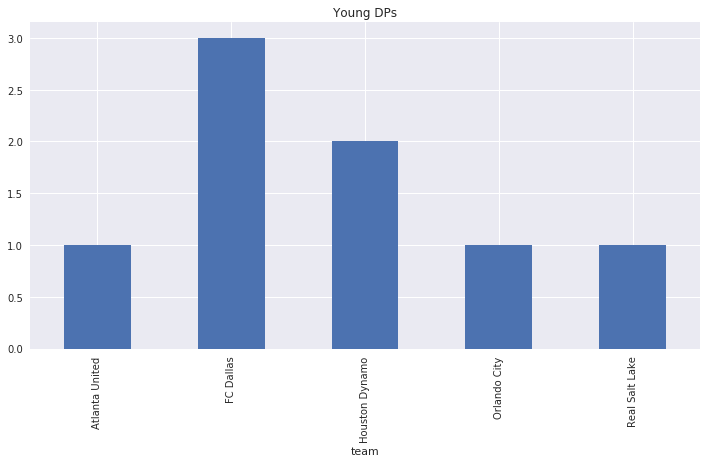

In [15]:
# Number of Young DPs on each team
df[df['YDP']== 1].groupby(df['team']).count()['YDP'].plot(kind='bar', title='Young DPs')

It's absolutely shocking to me that only 5 out of 23 teams take advantage of this rule. Having at least one YDP instead of a DP could free up ~300k for the rest of the team's roster.

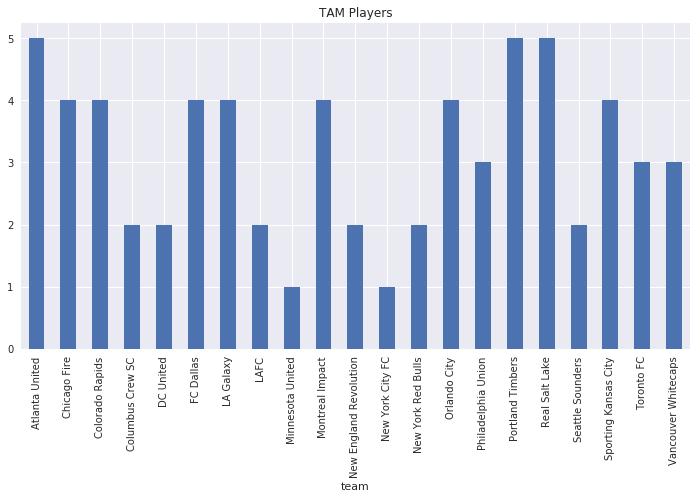

In [16]:
# Number of TAM Players on each team
df[df['TAM'] == 1].groupby(df['team']).count()['TAM'].plot(kind='bar', title= 'TAM Players')

TAM players are expected to be the next best players after a team's DP players.

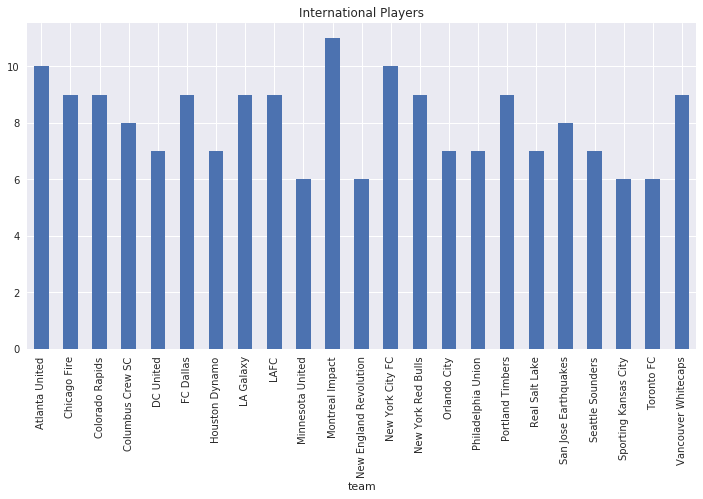

In [17]:
# Number of International Players on each team
df[df['INTL'] == 1].groupby(df['team']).count()['INTL'].plot(kind='bar', title='International Players')

Most teams take advantage of all 8 international slots allowed. Sometimes, teams go over the limit by acquiring other teams' slots in a trade.

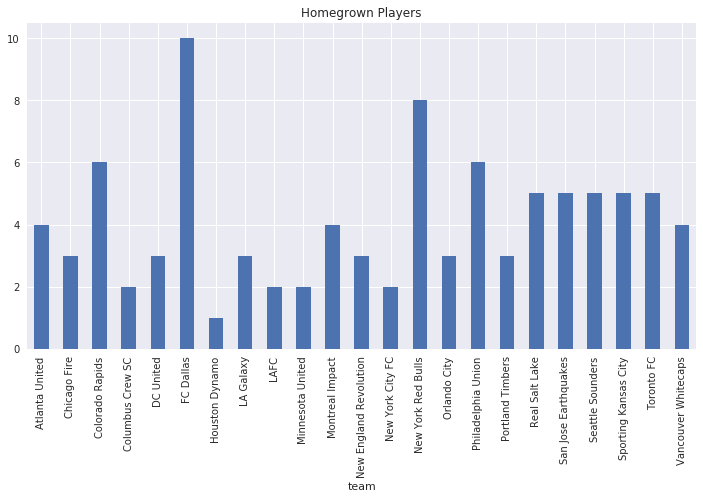

In [18]:
df[df['HG']== 1].groupby(df['team']).count()['HG'].plot(kind='bar', title= 'Homegrown Players')

### What happens when we put all this data into a table?

This table has each roster designation per team. It will be good for our measurement later.

In [19]:
roster_info = df[['DP', 'YDP', 'TAM', 'INTL', 'HG']].groupby(df['team']).aggregate(np.sum)
roster_info

,DP,YDP,TAM,INTL,HG
team,,,,,
Atlanta United,2,1,5,10,4
Chicago Fire,2,0,4,9,3
Colorado Rapids,2,0,4,9,6
Columbus Crew SC,3,0,2,8,2
DC United,1,0,2,7,3
FC Dallas,0,3,4,9,10
Houston Dynamo,0,2,0,7,1
LA Galaxy,3,0,4,9,3
LAFC,2,0,2,9,2


## Measuring Success

   In the USA, there's one thing you want to consider your successful. That thing is the playoffs. About half the teams of MLS make the playoffs. So, we will measure one half of the league vs the other half.

In [20]:
#Manually entered data from MLS Standings
table_data = {'team': ['Atlanta United',
                       'Sporting Kansas City', 
                       'New York City FC', 
                       'FC Dallas', 
                       'Columbus Crew SC', 
                       'New York Red Bulls', 
                       'Real Salt Lake',
                       'New England Revolution',
                       'LAFC',
                       'Portland Timbers',
                       'Vancouver Whitecaps',
                       'Orlando City',
                       'Houston Dynamo',
                       'Philadelphia Union',
                       'LA Galaxy',
                       'Chicago Fire',
                       'Minnesota United',
                       'Montreal Impact',
                       'Toronto FC',
                       'DC United',
                       'San Jose Earthquakes',
                       'Seattle Sounders',
                       'Colorado Rapids'],
              'PTS': [30, 29, 28, 29, 27, 23, 22, 23, 24, 22, 23, 19, 21, 18, 20, 18, 16, 12, 14, 9, 9, 11, 8],
              'GP': [15, 15, 15, 14, 16, 13, 15, 15, 14, 13, 16, 14, 14, 15, 15, 15, 14, 15, 13, 11, 14, 12, 13]}

In [21]:
#Creating the standings as a Pandas DataFrame
standings = pd.DataFrame(data=table_data, columns = ['team', 'PTS', 'GP'])

In [22]:
#Double checking that te standings are correct
standings.sort_values(by='PTS', ascending=False)

,team,PTS,GP
0,Atlanta United,30,15
3,FC Dallas,29,14
1,Sporting Kansas City,29,15
2,New York City FC,28,15
4,Columbus Crew SC,27,16
8,LAFC,24,14
5,New York Red Bulls,23,13
7,New England Revolution,23,15
10,Vancouver Whitecaps,23,16
6,Real Salt Lake,22,15


In [23]:
#Setting the team column to the index 
standings.set_index('team', inplace=True)

In [73]:
# Merging the roster_info table with the standings
mls = pd.merge(standings, roster_info, left_index=True, right_index=True)
mls

,PTS,GP,DP,YDP,TAM,INTL,HG
team,,,,,,,
Atlanta United,30,15,2,1,5,10,4
Sporting Kansas City,29,15,3,0,4,6,5
New York City FC,28,15,3,0,1,10,2
FC Dallas,29,14,0,3,4,9,10
Columbus Crew SC,27,16,3,0,2,8,2
New York Red Bulls,23,13,2,0,2,9,8
Real Salt Lake,22,15,1,1,5,7,5
New England Revolution,23,15,1,0,2,6,3
LAFC,24,14,2,0,2,9,2


In [86]:
# Counting Young DPs as DPs in a new column called total_DP
mls['total_DP'] = mls['DP'] + mls['YDP']
mls

,PTS,GP,DP,YDP,TAM,INTL,HG,total_DP
team,,,,,,,,
Atlanta United,30,15,2,1,5,10,4,3
Sporting Kansas City,29,15,3,0,4,6,5,3
New York City FC,28,15,3,0,1,10,2,3
FC Dallas,29,14,0,3,4,9,10,3
Columbus Crew SC,27,16,3,0,2,8,2,3
New York Red Bulls,23,13,2,0,2,9,8,2
Real Salt Lake,22,15,1,1,5,7,5,2
New England Revolution,23,15,1,0,2,6,3,1
LAFC,24,14,2,0,2,9,2,2


Now it's time to use this table to measure what it will take for a team to be successful.

The first example will be splitting the league based on how many DPs they have.

In [26]:
mls['total_DP'].quantile(0.5)

2.0

In [27]:
mls[mls['total_DP'] == 3]

,PTS,GP,DP,YDP,TAM,INTL,HG,total_DP
team,,,,,,,,
Atlanta United,30,15,2,1,5,10,4,3
Sporting Kansas City,29,15,3,0,4,6,5,3
New York City FC,28,15,3,0,1,10,2,3
FC Dallas,29,14,0,3,4,9,10,3
Columbus Crew SC,27,16,3,0,2,8,2,3
Portland Timbers,22,13,3,0,5,9,3,3
Orlando City,19,14,2,1,4,7,3,3
LA Galaxy,20,15,3,0,4,9,3,3
Toronto FC,14,13,3,0,3,6,5,3


Last year, the 46 was the minimum amount of points needed to make the playoffs. So, lets consider >= 46 points successful for this part.

In [28]:
round(mls[mls['total_DP'] == 3]['PTS'].sum() / mls[mls['total_DP'] == 3]['GP'].sum() * 34)

55

In [29]:
round(mls[mls['total_DP'] < 3]['PTS'].sum() / mls[mls['total_DP'] < 3]['GP'].sum() * 34)

42

A 13 point difference is remarkable. According to this, a team not using all 3 DP slots might not even make the playoffs.

Why not see if having just one Young DP can change the game? The data is there. Let's take a look.

In [30]:
mls['YDP'].quantile(0.5)

0.0

In [31]:
mls[mls['YDP'] >= 1]

,PTS,GP,DP,YDP,TAM,INTL,HG,total_DP
team,,,,,,,,
Atlanta United,30,15,2,1,5,10,4,3
FC Dallas,29,14,0,3,4,9,10,3
Real Salt Lake,22,15,1,1,5,7,5,2
Orlando City,19,14,2,1,4,7,3,3
Houston Dynamo,21,14,0,2,0,7,1,2


In [32]:
round(mls[mls['YDP'] >= 1]['PTS'].sum() / mls[mls['YDP'] >= 1]['GP'].sum() * 34)

57

In [33]:
round(mls[mls['YDP'] < 1]['PTS'].sum() / mls[mls['YDP'] < 1]['GP'].sum() * 34)

45

This seems consistent with the numbers we got from running all DPs.

Now, let's look at TAM players.

In [34]:
mls['TAM'].quantile(0.5)

3.0

In [75]:
mls[mls['TAM'] >= 4]

,PTS,GP,DP,YDP,TAM,INTL,HG
team,,,,,,,
Atlanta United,30,15,2,1,5,10,4
Sporting Kansas City,29,15,3,0,4,6,5
FC Dallas,29,14,0,3,4,9,10
Real Salt Lake,22,15,1,1,5,7,5
Portland Timbers,22,13,3,0,5,9,3
Orlando City,19,14,2,1,4,7,3
LA Galaxy,20,15,3,0,4,9,3
Chicago Fire,18,15,2,0,4,9,3
Montreal Impact,12,15,2,0,4,11,4


Look at teams with 3 TAM players vs. teams with less than 3 tam players

In [76]:
round(mls[mls['TAM'] > 3]['PTS'].sum() / mls[mls['TAM'] > 3]['GP'].sum() * 34)

49

In [78]:
round(mls[mls['TAM'] <= 3]['PTS'].sum() / mls[mls['TAM'] <= 3]['GP'].sum() * 34)

46

Almost no difference. 

In [38]:
mls['INTL'].quantile(0.5)

8.0

In [79]:
mls[mls['INTL'] > 8]

,PTS,GP,DP,YDP,TAM,INTL,HG
team,,,,,,,
Atlanta United,30,15,2,1,5,10,4
New York City FC,28,15,3,0,1,10,2
FC Dallas,29,14,0,3,4,9,10
New York Red Bulls,23,13,2,0,2,9,8
LAFC,24,14,2,0,2,9,2
Portland Timbers,22,13,3,0,5,9,3
Vancouver Whitecaps,23,16,2,0,3,9,4
LA Galaxy,20,15,3,0,4,9,3
Chicago Fire,18,15,2,0,4,9,3


In [80]:
round((mls[mls['INTL'] > 8]['PTS'].sum() / mls[mls['INTL'] > 8]['GP'].sum()) * 34)

51

In [81]:
round((mls[mls['INTL'] <= 8]['PTS'].sum() / mls[mls['INTL'] <= 8]['GP'].sum()) * 34)

44

7 points is not as big as 13, but still something to consider

In [42]:
mls['HG'].quantile(0.5)

4.0

look at teams with 4 or more homegrowns vs. less than 4 

In [82]:
round((mls[mls['HG'] > 4]['PTS'].sum() / mls[mls['HG'] > 4]['GP'].sum()) * 34)

45

In [83]:
round((mls[mls['HG'] <= 4]['PTS'].sum() / mls[mls['HG'] <= 4]['GP'].sum()) * 34)

49

It looks like it doesn't pay off to have an academy.

Now let's see what happens when we combine our previous requirements.

In [87]:
#DPs and Internationals
mls[(mls['total_DP'] == 3) & (mls['INTL'] > 8)]

,PTS,GP,DP,YDP,TAM,INTL,HG,total_DP
team,,,,,,,,
Atlanta United,30,15,2,1,5,10,4,3
New York City FC,28,15,3,0,1,10,2,3
FC Dallas,29,14,0,3,4,9,10,3
Portland Timbers,22,13,3,0,5,9,3,3
LA Galaxy,20,15,3,0,4,9,3,3


In [89]:
round((mls[(mls['total_DP'] == 3) & (mls['INTL'] > 8)]['PTS'].sum() / mls[(mls['total_DP'] == 3) & (mls['INTL'] > 8)]['GP'].sum()) * 34)

61

In [88]:
round((mls[(mls['total_DP'] < 3) & (mls['INTL'] <= 8)]['PTS'].sum() / mls[(mls['total_DP'] < 3) & (mls['INTL'] <= 8)]['GP'].sum()) * 34)

41

This is the widest difference in expected points so far. It seems to me that the best way to go is to find international DPs, internationals or just DPs.

In [91]:
#DPs and TAM players
mls[(mls['total_DP'] == 3) & (mls['TAM'] > 3)]

,PTS,GP,DP,YDP,TAM,INTL,HG,total_DP
team,,,,,,,,
Atlanta United,30,15,2,1,5,10,4,3
Sporting Kansas City,29,15,3,0,4,6,5,3
FC Dallas,29,14,0,3,4,9,10,3
Portland Timbers,22,13,3,0,5,9,3,3
Orlando City,19,14,2,1,4,7,3,3
LA Galaxy,20,15,3,0,4,9,3,3


In [92]:
round(mls[(mls['total_DP'] == 3) & (mls['TAM'] > 3)]['PTS'].sum() / mls[(mls['total_DP'] == 3) & (mls['TAM'] > 3)]['GP'].sum() * 34)

59

In [93]:
round(mls[(mls['total_DP'] < 3) | (mls['TAM'] <= 3)]['PTS'].sum() / mls[(mls['total_DP'] < 3) | (mls['TAM'] <= 3)]['GP'].sum() * 34)

43

Once again, it pays of to have all DP slots full.

In [94]:
mls[(mls['total_DP'] == 3) & (mls['HG'] > 4)]

,PTS,GP,DP,YDP,TAM,INTL,HG,total_DP
team,,,,,,,,
Sporting Kansas City,29,15,3,0,4,6,5,3
FC Dallas,29,14,0,3,4,9,10,3
Toronto FC,14,13,3,0,3,6,5,3
Seattle Sounders,11,12,3,0,2,7,5,3


In [95]:
round(mls[(mls['total_DP'] == 3) & (mls['HG'] > 4)]['PTS'].sum() / mls[(mls['total_DP'] == 3) & (mls['HG'] > 4)]['GP'].sum() * 34)

52

In [96]:
round(mls[(mls['total_DP'] < 3) | (mls['HG'] <= 4)]['PTS'].sum() / mls[(mls['total_DP'] < 3) | (mls['HG'] <= 4)]['GP'].sum() * 34)

46

In [98]:
#TAM and Internationals
mls[(mls['TAM'] > 3) & (mls['INTL'] > 8)]

,PTS,GP,DP,YDP,TAM,INTL,HG,total_DP
team,,,,,,,,
Atlanta United,30,15,2,1,5,10,4,3
FC Dallas,29,14,0,3,4,9,10,3
Portland Timbers,22,13,3,0,5,9,3,3
LA Galaxy,20,15,3,0,4,9,3,3
Chicago Fire,18,15,2,0,4,9,3,2
Montreal Impact,12,15,2,0,4,11,4,2
Colorado Rapids,8,13,2,0,4,9,6,2


In [99]:
round(mls[(mls['TAM'] > 3) & (mls['INTL'] > 8)]['PTS'].sum() / mls[(mls['TAM'] > 3) & (mls['INTL'] > 8)]['GP'].sum() * 34)

47

In [100]:
round(mls[(mls['TAM'] <= 3) | (mls['INTL'] <= 8)]['PTS'].sum() / mls[(mls['TAM'] <= 3) | (mls['INTL'] <= 8)]['GP'].sum() * 34)

48

No real difference here.

In [101]:
mls[(mls['TAM'] > 3) & (mls['HG'] > 4)]

,PTS,GP,DP,YDP,TAM,INTL,HG,total_DP
team,,,,,,,,
Sporting Kansas City,29,15,3,0,4,6,5,3
FC Dallas,29,14,0,3,4,9,10,3
Real Salt Lake,22,15,1,1,5,7,5,2
Colorado Rapids,8,13,2,0,4,9,6,2


In [102]:
round(mls[(mls['TAM'] > 3) & (mls['HG'] > 4)]['PTS'].sum() / mls[(mls['TAM'] > 3) & (mls['INTL'] > 8)]['GP'].sum() * 34)

30

In [103]:
round(mls[(mls['TAM'] <= 3) | (mls['HG'] <= 4)]['PTS'].sum() / mls[(mls['TAM'] <= 3) | (mls['INTL'] <= 8)]['GP'].sum() * 34)

55

Once again, teams with Homegrown players don't look to be doing so hot.

In [71]:
mls[(mls['total_DP'] == 3) & (mls['TAM'] >3) & (mls['INTL'] >8)]

,PTS,GP,DP,YDP,TAM,INTL,HG,total_DP
team,,,,,,,,
Atlanta United,30,15,2,1,5,10,4,3
FC Dallas,29,14,0,3,4,9,10,3
Portland Timbers,22,13,3,0,5,9,3,3
LA Galaxy,20,15,3,0,4,9,3,3


In [105]:
round(mls[(mls['total_DP'] == 3) & (mls['TAM'] >3) & (mls['INTL'] >8)]['PTS'].sum() / mls[(mls['total_DP'] == 3) & (mls['TAM'] >3) & (mls['INTL'] > 8)]['GP'].sum() * 34)

60

In [104]:
round(mls[(mls['total_DP'] < 3) | (mls['TAM'] <= 3) | (mls['INTL'] <= 8)]['PTS'].sum() / mls[(mls['total_DP'] < 3) | (mls['TAM'] <= 3) | (mls['INTL'] <= 8)]['GP'].sum() * 34)

45

The real difference makers seem to be DPs and Internationals.

### THE END

### Team Analysis ###

In [60]:
df.groupby(['team','pos'])['base_salary'].sum()

team                  pos
Atlanta United        D       1936434.21
                      F       2341512.04
                      GK       801516.00
                      M       5235154.24
Chicago Fire          D       1282640.04
                      F       2719000.08
                      GK       253154.28
                      M       8760551.70
Colorado Rapids       D       1667492.04
                      F       1815906.33
                      GK      2270008.00
                      M       2585570.24
                      M/F     1575000.00
Columbus Crew SC      D       1977754.24
                      F        802500.00
                      GK       292756.00
                      M       3504573.19
DC United             D        931531.25
                      D/M       80000.00
                      F        717496.00
                      GK       538906.29
                      M        998995.92
                      M/F     2611363.48
FC Dallas             D       1

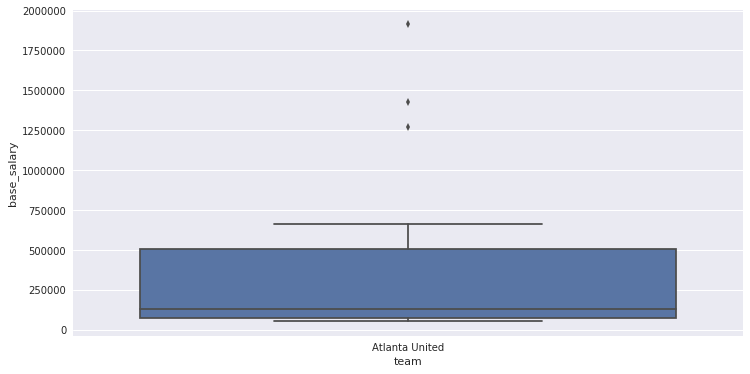

In [61]:
#Idea to look at teams' salary distributions. find a way to see if even distribution leads to better results
sns.boxplot(x='team', y='base_salary', data= df[df['team'] == 'Atlanta United'])

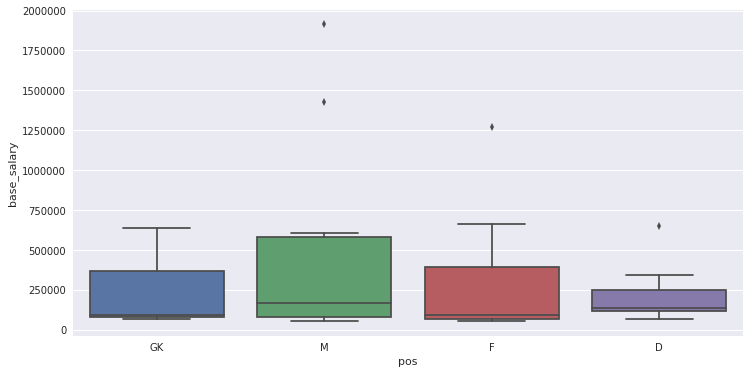

In [62]:
#Shows the distribution of Salarys between positions. Will do this for every team
sns.boxplot(x='pos', y='base_salary', data=df[df['team'] == 'Atlanta United'])

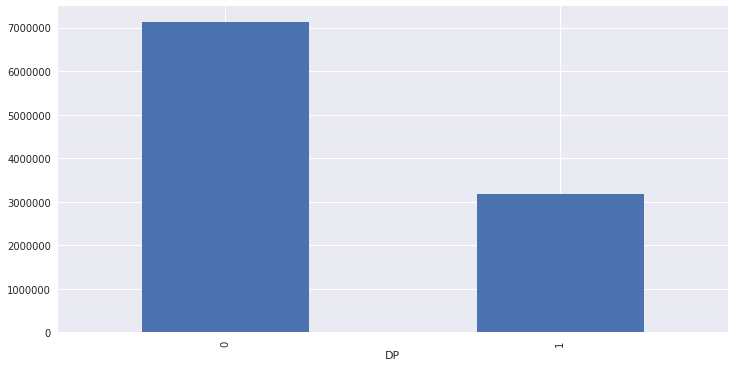

In [63]:
df[df['team'] == 'Atlanta United'].groupby('DP').aggregate(np.sum)['base_salary'].plot(kind='bar')

In [64]:
df[(df['team'] == 'Atlanta United') & ((df['DP'] == 0) | (df['YDP'] == 1))]['base_salary'].sum()

7132108.49

In [65]:
df[(df['team'] == 'Atlanta United') & ((df['DP'] == 1) | (df['YDP'] == 1))]['base_salary'].sum()

4607508.0

In [66]:
#money spent on non-dps. 
df[(df['DP'] == 0) & (df['YDP'] == 0)].groupby('team')['base_salary'].sum().sort_values(ascending=False)

team
Real Salt Lake            7003519.92
LA Galaxy                 6941683.75
Toronto FC                6436297.21
Colorado Rapids           6338976.61
Portland Timbers          6314410.04
FC Dallas                 6229754.16
Vancouver Whitecaps       6092516.44
Orlando City              5855667.84
Montreal Impact           5796410.64
Seattle Sounders          5767458.28
Atlanta United            5707108.49
Sporting Kansas City      5620985.64
Philadelphia Union        5522664.11
New England Revolution    5292173.54
DC United                 5253292.98
Chicago Fire              5215345.98
Minnesota United          5034391.86
New York City FC          4989557.67
San Jose Earthquakes      4882230.70
New York Red Bulls        4746972.36
LAFC                      4715368.69
Columbus Crew SC          4447983.39
Houston Dynamo            3851340.09
Name: base_salary, dtype: float64

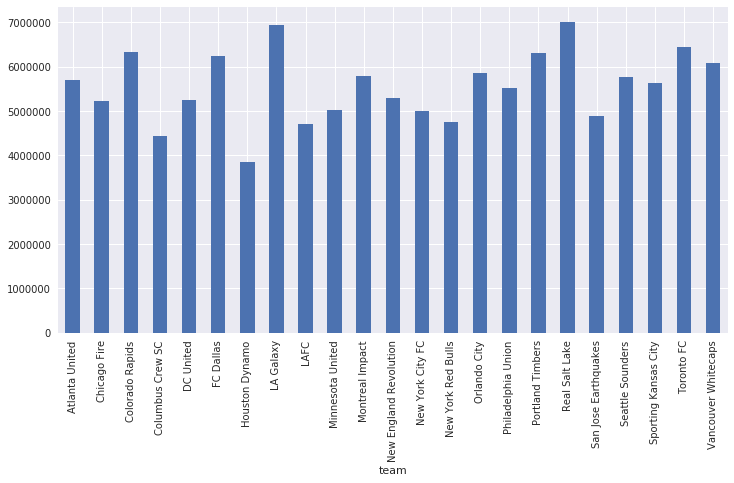

In [67]:
df[(df['DP'] == 0) & (df['YDP'] == 0)].groupby('team')['base_salary'].sum().plot(kind='bar', figsize=(12,6))